<a href="https://colab.research.google.com/github/ZintleFaltein/Covid-modelling/blob/Rachel/Covid_Modelling_projections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Covid- 19  Modelling



In [13]:
!pip install "git+https://github.com/lisphilar/covid19-sir.git#egg=covsirphy"

  Cloning https://github.com/lisphilar/covid19-sir.git to /tmp/pip-install-81ymmxku/covsirphy
  Running command git clone -q https://github.com/lisphilar/covid19-sir.git /tmp/pip-install-81ymmxku/covsirphy
     |████████████████████████████████| 235kB 2.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 174kB 8.7MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 1.1MB 10.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 92kB 8.7MB/s 
     |████████████████████████████████| 655kB 16.9MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 133kB 19.8MB/s 
     |████████████████████████████████| 112kB 19

In [61]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import pandas as pd
import pandas
import datetime
import matplotlib.dates as mdates
#from helper_fun_model import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


import warnings
warnings.filterwarnings('ignore')

import covsirphy as cs

#Import the Datasets

In [68]:
lockdown = pd.read_csv(
     'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/lockdown/covid19za_provincial_cumulative_timeline_lockdown.csv')
confirmed = pd.read_csv(
    'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_provincial_cumulative_timeline_confirmed.csv')
recovered = pd.read_csv('https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_provincial_cumulative_timeline_recoveries.csv')
deaths = pd.read_csv(
    'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_provincial_cumulative_timeline_deaths.csv')
transmission = pd.read_csv(
    'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_timeline_transmission_type.csv')
tests = pd.read_csv(
    'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_provincial_cumulative_timeline_testing.csv')

In [46]:
recovered

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,source
0,17-04-2020,20200417,9,71,479,96,18,9,10,6,205,0,903,https://twitter.com/nicd_sa/status/12512151947...
1,18-04-2020,20200418,9,71,479,96,18,9,10,6,205,0,903,https://twitter.com/nicd_sa/status/12515952235...
2,19-04-2020,20200419,9,71,479,96,18,9,10,6,205,0,903,https://twitter.com/nicd_sa/status/12519270552...
3,20-04-2020,20200420,15,74,545,151,21,14,13,6,216,0,1055,https://twitter.com/nicd_sa/status/12523098244...
4,21-04-2020,20200421,15,74,545,151,21,14,13,6,216,0,1055,https://twitter.com/nicd_sa/status/12526435556...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,02-09-2020,20200902,82233,25999,184274,100605,12486,23004,7420,19388,98047,0,553456,https://twitter.com/nicd_sa/status/13012465363...
133,03-09-2020,20200903,82233,26056,184538,100766,12647,23046,7526,20028,98047,0,554887,https://twitter.com/nicd_sa/status/13016021023...
134,04-09-2020,20200904,82233,27129,185192,101034,12647,23315,7551,20028,98689,0,557818,https://twitter.com/nicd_sa/status/13019655662...
135,05-09-2020,20200905,82233,27129,186731,101797,12702,23475,7573,20554,99010,0,561204,https://twitter.com/nicd_sa/status/13023151403...


#Exploring The Data

In [34]:
lockdown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      3 non-null      object
 1   YYYYMMDD  3 non-null      int64 
 2   EC        3 non-null      int64 
 3   FS        3 non-null      int64 
 4   GP        3 non-null      int64 
 5   KZN       3 non-null      int64 
 6   LP        3 non-null      int64 
 7   MP        3 non-null      int64 
 8   NC        3 non-null      int64 
 9   NW        3 non-null      int64 
 10  WC        3 non-null      int64 
 11  source    3 non-null      object
dtypes: int64(10), object(2)
memory usage: 416.0+ bytes


In [7]:
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      184 non-null    object 
 1   YYYYMMDD  184 non-null    int64  
 2   EC        182 non-null    float64
 3   FS        182 non-null    float64
 4   GP        182 non-null    float64
 5   KZN       182 non-null    float64
 6   LP        182 non-null    float64
 7   MP        182 non-null    float64
 8   NC        182 non-null    float64
 9   NW        182 non-null    float64
 10  WC        182 non-null    float64
 11  UNKNOWN   182 non-null    float64
 12  total     184 non-null    int64  
 13  source    139 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 20.2+ KB


In [8]:
recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      137 non-null    object
 1   YYYYMMDD  137 non-null    int64 
 2   EC        137 non-null    int64 
 3   FS        137 non-null    int64 
 4   GP        137 non-null    int64 
 5   KZN       137 non-null    int64 
 6   LP        137 non-null    int64 
 7   MP        137 non-null    int64 
 8   NC        137 non-null    int64 
 9   NW        137 non-null    int64 
 10  WC        137 non-null    int64 
 11  UNKNOWN   137 non-null    int64 
 12  total     137 non-null    int64 
 13  source    137 non-null    object
dtypes: int64(12), object(2)
memory usage: 15.1+ KB


In [9]:
transmission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   case_id            709 non-null    int64 
 1   transmission_type  274 non-null    object
 2   type               709 non-null    object
 3   countries          129 non-null    object
 4   Unnamed: 4         16 non-null     object
dtypes: int64(1), object(4)
memory usage: 27.8+ KB


In [10]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      160 non-null    object
 1   YYYYMMDD  160 non-null    int64 
 2   EC        160 non-null    int64 
 3   FS        160 non-null    int64 
 4   GP        160 non-null    int64 
 5   KZN       160 non-null    int64 
 6   LP        160 non-null    int64 
 7   MP        160 non-null    int64 
 8   NC        160 non-null    int64 
 9   NW        160 non-null    int64 
 10  WC        160 non-null    int64 
 11  UNKNOWN   160 non-null    int64 
 12  total     160 non-null    int64 
 13  source    153 non-null    object
dtypes: int64(12), object(2)
memory usage: 17.6+ KB


In [11]:
tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      6 non-null      object
 1   YYYYMMDD  6 non-null      int64 
 2   EC        6 non-null      int64 
 3   FS        6 non-null      int64 
 4   GP        6 non-null      int64 
 5   KZN       6 non-null      int64 
 6   LP        6 non-null      int64 
 7   MP        6 non-null      int64 
 8   NC        6 non-null      int64 
 9   NW        6 non-null      int64 
 10  WC        6 non-null      int64 
 11  UNKNOWN   6 non-null      int64 
 12  total     6 non-null      int64 
 13  source    6 non-null      object
dtypes: int64(12), object(2)
memory usage: 800.0+ bytes


In [30]:
tests.head()


,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,source
0,27-04-2020,20200427,14054,6317,61830,28265,3691,4385,1314,2544,33335,12908,168643,ministerial briefing 26-04-2020
1,03-05-2020,20200503,24835,12634,85134,45955,5626,6691,1951,3565,53967,17183,257541,https://www.nicd.ac.za/wp-content/uploads/2020...
2,09-05-2020,20200509,34032,17231,111630,61801,7783,9823,3092,5213,70038,20693,341336,https://www.nicd.ac.za/wp-content/uploads/2020...
3,13-05-2020,20200513,38122,19265,127030,67853,8239,11414,3683,5812,82865,22069,386352,https://twitter.com/bandilemasuku/status/12609...
4,20-05-2020,20200520,51888,24415,166394,86448,10579,14964,4776,8830,112612,25955,506681,https://twitter.com/GautengProvince/status/126...


##Cleaning and Preprocessing

In [14]:
import covsirphy as cs
cs.get_version()

'CovsirPhy v2.8.1-beta.fix.211.226'

In [69]:

confirmed['date'] = pd.to_datetime(confirmed['date'], format='%d-%m-%Y')
confirmed = confirmed.rename(columns={'total': 'confirmed'})
tests = tests.rename(columns={'total': 'num_tests'})
recovered = recovered.rename(columns={'total': 'recovered'})
deaths = deaths.rename(columns={'total': 'deaths'})

In [70]:
dataset = pd.concat([confirmed['date'],tests['num_tests'] ,confirmed['confirmed'],
                         recovered['recovered'], deaths['deaths']], axis=1)


In [71]:
dataset

,date,num_tests,confirmed,recovered,deaths
0,2020-03-05,168643.0,1,903.0,1.0
1,2020-03-07,257541.0,2,903.0,2.0
2,2020-03-08,341336.0,3,903.0,3.0
3,2020-03-09,386352.0,7,1055.0,5.0
4,2020-03-11,506681.0,13,1055.0,9.0
...,...,...,...,...,...
179,2020-09-02,NaN,630595,NaN,NaN
180,2020-09-03,NaN,633015,NaN,NaN
181,2020-09-04,NaN,635078,NaN,NaN
182,2020-09-05,NaN,636884,NaN,NaN


In [72]:
# shift rows down so that dates correspond
dataset['num_tests'] = dataset['num_tests'].shift(52)
dataset['recovered'] = dataset['recovered'].shift(42)
dataset['deaths'] = dataset['deaths'].shift(20)


In [199]:
dataset.tail(10)

,date,num_tests,confirmed,recovered,deaths,Active_cases,recovered_per_confirmed,death_per_confirmed
174,2020-08-28,0.0,620123,553456.0,14263.0,52404.0,0.892494,0.023000
175,2020-08-29,0.0,622551,554887.0,14389.0,53275.0,0.891312,0.023113
176,2020-08-30,0.0,625056,557818.0,14563.0,52675.0,0.892429,0.023299
177,2020-08-31,0.0,627041,561204.0,14678.0,51159.0,0.895004,0.023408
178,2020-09-01,0.0,628259,563891.0,14779.0,49589.0,0.897545,0.023524
179,2020-09-02,0.0,630595,0.0,14889.0,615706.0,0.000000,0.023611
180,2020-09-03,0.0,633015,0.0,0.0,633015.0,0.000000,0.000000
181,2020-09-04,0.0,635078,0.0,0.0,635078.0,0.000000,0.000000
182,2020-09-05,0.0,636884,0.0,0.0,636884.0,0.000000,0.000000
183,2020-09-06,0.0,638517,0.0,0.0,638517.0,0.000000,0.000000


In [74]:
dataset = dataset.fillna(0)

In [75]:
dataset.head(3)

,date,num_tests,confirmed,recovered,deaths
0,2020-03-05,0.0,1,0.0,0.0
1,2020-03-07,0.0,2,0.0,0.0
2,2020-03-08,0.0,3,0.0,0.0


In [85]:
dataset['Active_cases'] = dataset['confirmed'] - dataset['recovered'] - dataset['deaths']
dataset['recovered_per_confirmed'] = (dataset['recovered']/dataset['confirmed'])
dataset['death_per_confirmed'] = (dataset['deaths']/dataset['confirmed'])

In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     184 non-null    datetime64[ns]
 1   num_tests                184 non-null    float64       
 2   confirmed                184 non-null    int64         
 3   recovered                184 non-null    float64       
 4   deaths                   184 non-null    float64       
 5   Active_cases             184 non-null    float64       
 6   recovered_per_confirmed  184 non-null    float64       
 7   death_per_confirmed      184 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 11.6 KB


In [87]:
df = dataset.copy()

In [90]:
df = df[df['date'] != df['date'].max()] # remove todays' records (since it might be incompleted)

In [91]:
df.tail()

,date,num_tests,confirmed,recovered,deaths,Active_cases,recovered_per_confirmed,death_per_confirmed
178,2020-09-01,0.0,628259,563891.0,14779.0,49589.0,0.897545,0.023524
179,2020-09-02,0.0,630595,0.0,14889.0,615706.0,0.000000,0.023611
180,2020-09-03,0.0,633015,0.0,0.0,633015.0,0.000000,0.000000
181,2020-09-04,0.0,635078,0.0,0.0,635078.0,0.000000,0.000000
182,2020-09-05,0.0,636884,0.0,0.0,636884.0,0.000000,0.000000


#Visualization

In [94]:
data_cols = ['confirmed',
                         'recovered', 
                                   'deaths',
             ]


rate_cols = ["recovered_per_confirmed", "death_per_confirmed"]

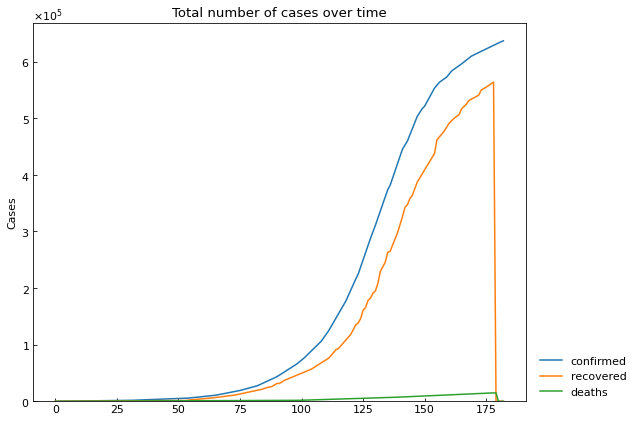

In [95]:
cs.line_plot(df[data_cols], "Total number of cases over time")

In [99]:
case = pd.concat([df['confirmed'],df['Active_cases']],axis=1)

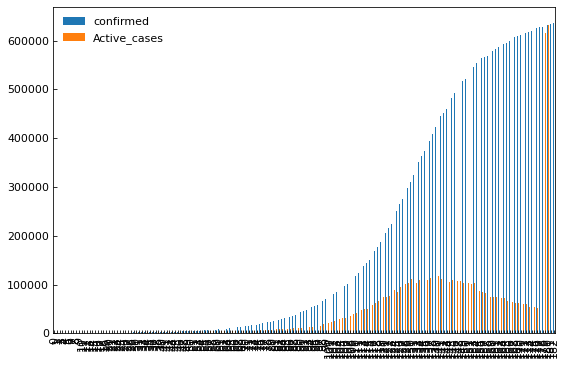

In [100]:
case.plot(kind='bar')
plt.show()

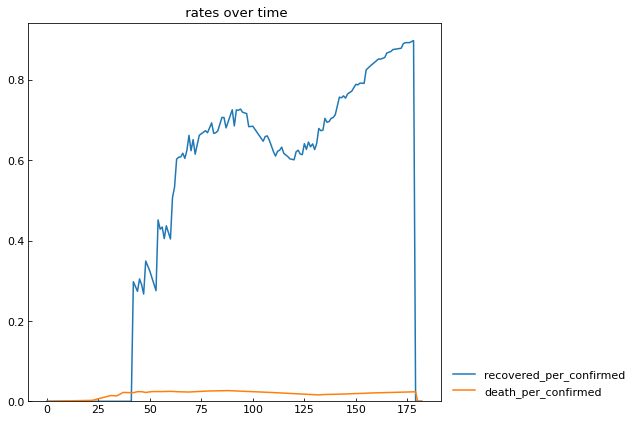

In [102]:
cs.line_plot(df[rate_cols], " rates over time", ylabel="", math_scale=False)

#Polynomial Regression

In [104]:
df.head()

,date,num_tests,confirmed,recovered,deaths,Active_cases,recovered_per_confirmed,death_per_confirmed
0,2020-03-05,0.0,1,0.0,0.0,1.0,0.0,0.0
1,2020-03-07,0.0,2,0.0,0.0,2.0,0.0,0.0
2,2020-03-08,0.0,3,0.0,0.0,3.0,0.0,0.0
3,2020-03-09,0.0,7,0.0,0.0,7.0,0.0,0.0
4,2020-03-11,0.0,13,0.0,0.0,13.0,0.0,0.0


In [111]:
df['days'] = [i+1 for i in range(len(df))]

In [112]:
df.head()

,date,num_tests,confirmed,recovered,deaths,Active_cases,recovered_per_confirmed,death_per_confirmed,days
0,2020-03-05,0.0,1,0.0,0.0,1.0,0.0,0.0,1
1,2020-03-07,0.0,2,0.0,0.0,2.0,0.0,0.0,2
2,2020-03-08,0.0,3,0.0,0.0,3.0,0.0,0.0,3
3,2020-03-09,0.0,7,0.0,0.0,7.0,0.0,0.0,4
4,2020-03-11,0.0,13,0.0,0.0,13.0,0.0,0.0,5


In [130]:
X = df['days']

y= df['confirmed']

In [157]:
X= np.array(X)
y=np.array(y)


X =X.reshape(-1, 1)
y=y.reshape(-1, 1)

In [159]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [160]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

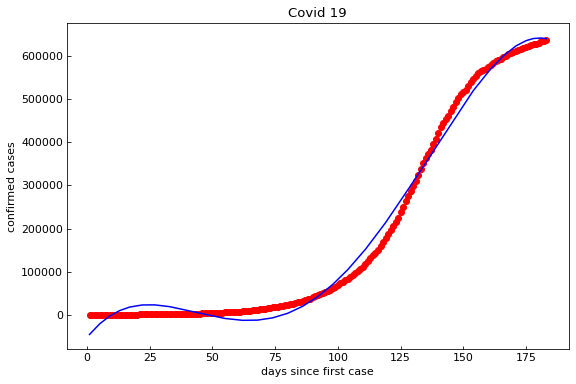

In [166]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Covid 19')
plt.xlabel('days since first case')
plt.ylabel('confirmed cases')
plt.show()

In [165]:
lin_reg_2.predict(poly_reg.fit_transform([[183]]))     #prediction for the 6th of september  ////Actual value was = 638 517


array([[639527.88499899]])

In [163]:
df.tail()

,date,num_tests,confirmed,recovered,deaths,Active_cases,recovered_per_confirmed,death_per_confirmed,days
178,2020-09-01,0.0,628259,563891.0,14779.0,49589.0,0.897545,0.023524,179
179,2020-09-02,0.0,630595,0.0,14889.0,615706.0,0.000000,0.023611,180
180,2020-09-03,0.0,633015,0.0,0.0,633015.0,0.000000,0.000000,181
181,2020-09-04,0.0,635078,0.0,0.0,635078.0,0.000000,0.000000,182
182,2020-09-05,0.0,636884,0.0,0.0,636884.0,0.000000,0.000000,183


#SIR Modelling

The SIR model more accurately represents how an infection would spread through a
population because it takes into consideration that some people will recover from the
disease and no longer be susceptible. This model assumes that people who recover from
the infection become immune and cannot become infected a second time (https://calculate.org.au/wp-content/uploads/sites/15/2018/10/spread-of-disease.pdf)

In [173]:
#b = df['recove']

g = df['recovered_per_confirmed'].mean()

In [174]:
g

0.49502912287616524

In [178]:
(df['confirmed']/df['days']).mean()

1283.8218978142916

In [181]:
(df['confirmed']/58000000).mean()

0.003221349820991144

In [195]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.5, 0.14
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T



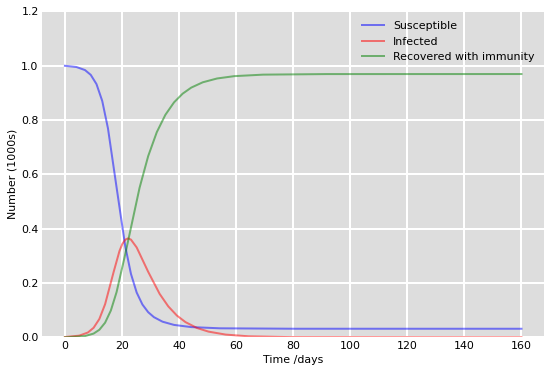

In [196]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()